<a href="https://colab.research.google.com/github/miguel-fc/Colab-Notebooks/blob/main/jVAE_organelles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import cv2
import imutils

import numpy as np

from math import sqrt
from skimage import data
from skimage.feature import blob_dog, blob_log, blob_doh
from skimage.color import rgb2gray

import matplotlib.pyplot as plt

In [ ]:
#!gdown "https://drive.google.com/uc?id=11LodRxYqpThj1smdSP83hIlIcESWpKJO"
# !gdown "https://drive.google.com/uc?id=1RlMqpRAnO6Zz9LNRLW2vNNrhvbDJXsao"
# !gdown "https://drive.google.com/uc?id=1YhQExzA4OJVkqaukaf5y9hQAaGWFGJZR"
!gdown "https://drive.google.com/uc?id=1e1jKSuhzaOCgBlCSYm0nUumSg5HM8BSu"
!gdown "https://drive.google.com/uc?id=1BsT7uiEyewVBBIGZkRm5lPYo1q4wOeWE"

Downloading...
From: https://drive.google.com/uc?id=1e1jKSuhzaOCgBlCSYm0nUumSg5HM8BSu
To: /content/threshold_control09.npy
22.6MB [00:00, 138MB/s]
Downloading...
From: https://drive.google.com/uc?id=1BsT7uiEyewVBBIGZkRm5lPYo1q4wOeWE
To: /content/threshold_control02.npy
22.6MB [00:00, 72.1MB/s]


In [ ]:
#image = np.load("control09.npy")
# image = np.load("ccmlpdt4.npy")
# image = np.load("threshold_ccmlpdt4.npy")
# image = np.load("threshold_control09.npy")
image = np.load("threshold_control02.npy")

In [ ]:
image_gray = rgb2gray(image)

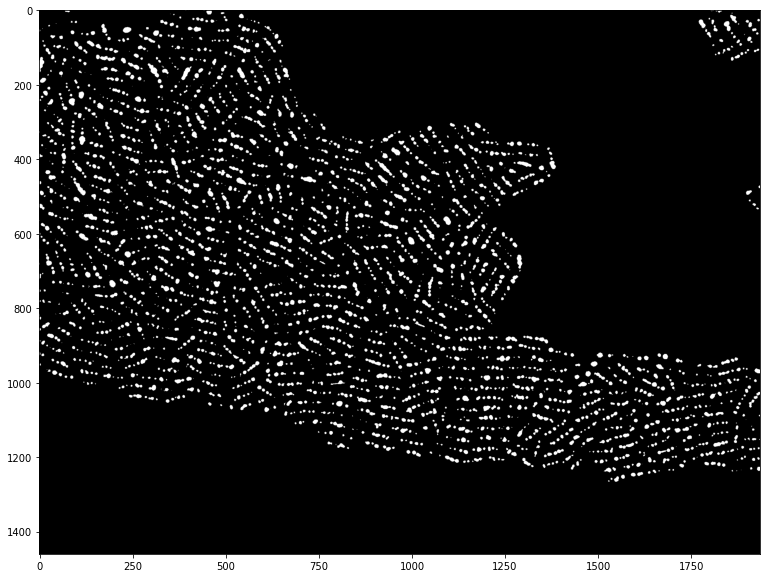

In [ ]:
fig, ax = plt.subplots(figsize=(25, 10))
ax.imshow(image,cmap='gray') 
plt.show()

In [ ]:
# blobs_log = blob_log(image_gray, min_sigma = .1, max_sigma=5, num_sigma=10, threshold=.06, overlap = 0.1)
blobs_log = blob_log(image_gray, max_sigma=5, num_sigma=10, threshold=.1)

/usr/local/lib/python3.7/dist-packages/skimage/feature/blob.py:125: RuntimeWarning: invalid value encountered in double_scalars
  r1 = blob1[-1] / blob2[-1]
/usr/local/lib/python3.7/dist-packages/skimage/feature/blob.py:126: RuntimeWarning: divide by zero encountered in true_divide
  pos1 = blob1[:ndim] / (max_sigma * root_ndim)
/usr/local/lib/python3.7/dist-packages/skimage/feature/blob.py:127: RuntimeWarning: divide by zero encountered in true_divide
  pos2 = blob2[:ndim] / (max_sigma * root_ndim)
/usr/local/lib/python3.7/dist-packages/skimage/feature/blob.py:129: RuntimeWarning: invalid value encountered in subtract
  d = np.sqrt(np.sum((pos2 - pos1)**2))


In [ ]:
blob_log

<function skimage.feature.blob.blob_log>

In [ ]:
# Compute radii in the 3rd column.
blobs_log[:, 2] = blobs_log[:, 2] * sqrt(2)

In [ ]:
blobs_list = [blobs_log]
colors = ['red']
titles = ['Laplacian of Gaussian']
sequence = zip(blobs_list, colors, titles)


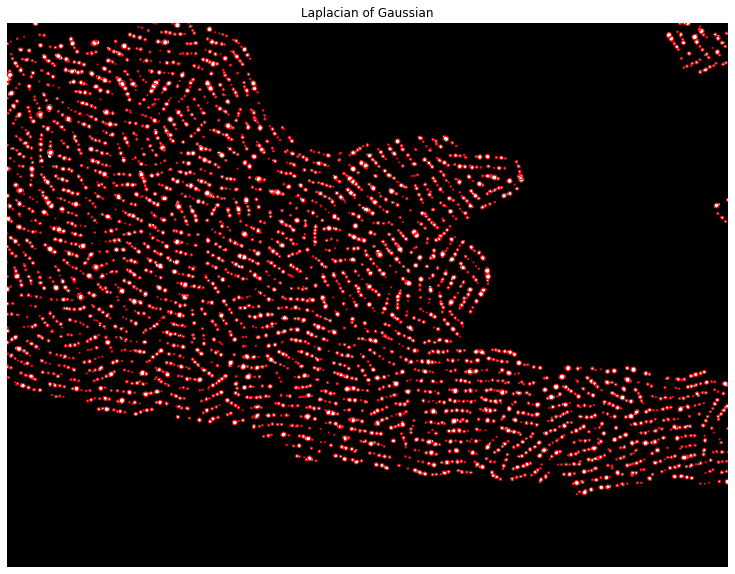

In [ ]:
blobs_list = [blobs_log]
colors = ['red']
titles = ['Laplacian of Gaussian']
sequence = zip(blobs_list, colors, titles)
fig, ax = plt.subplots(figsize=(25, 10))
for idx, (blobs, color, title) in enumerate(sequence):
  ax.set_title(title)
  ax.imshow(image,cmap='gray')  
  for blob in blobs:
    y, x, r = blob
    c = plt.Circle((x, y), r, color=color, linewidth=1, fill=False)
    ax.add_patch(c) 
    ax.set_axis_off()

plt.show()

In [ ]:
blobs_log.shape

(3522, 3)

In [ ]:
blobs_log

array([[1.26400000e+03, 1.53000000e+03, 2.04275292e+00],
       [1.25900000e+03, 1.55100000e+03, 6.44252845e+00],
       [1.25800000e+03, 1.53700000e+03, 2.67129228e+00],
       ...,
       [0.00000000e+00, 4.43000000e+02, 2.04275292e+00],
       [0.00000000e+00, 3.93000000e+02, 1.41421356e+00],
       [0.00000000e+00, 7.60000000e+01, 6.44252845e+00]])

In [ ]:
  loc_dict = {}
  j = 0

  for c in range(blobs_log.shape[0]):
    # print(blobs_log[c][0], blobs_log[c][1])
    loc_dict[j] = [blobs_log[c][0], blobs_log[c][1]]
    j = j+1

  coord_dict= loc_dict

In [ ]:
#coord_dict

In [ ]:
!pip install atomai

     |████████████████████████████████| 133kB 8.7MB/s 
     |████████████████████████████████| 184kB 27.7MB/s 
     |████████████████████████████████| 870kB 25.3MB/s 
     |████████████████████████████████| 993kB 47.2MB/s 
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
  Found existing installation: Pygments 2.6.1
    Uninstalling Pygments-2.6.1:
      Successfully uninstalled Pygments-2.6.1


In [ ]:
import atomai as aoi

In [ ]:
coord = np.delete(blobs_log, 2, axis=1)

In [ ]:
coord.shape

(3522, 2)

In [ ]:
window_size = 48
subimg, subimg_coord, subimg_frame = aoi.utils.extract_subimages(image_gray,coord,window_size,0)

In [ ]:
subimg.shape

(3414, 48, 48, 1)

In [ ]:
subimg = np.squeeze(subimg*1.0)
subimg = (subimg - subimg.min())/(subimg.max() - subimg.min())
subimg.shape

(3414, 48, 48)

In [ ]:
subimg_ind = np.zeros_like(subimg)

for i, ind in enumerate(subimg):
  subimg_ind[i] = (ind - ind.min())/(ind.max() - ind.min())

In [ ]:
subimg_ind.shape

(3414, 48, 48)

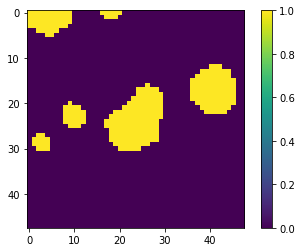

In [ ]:
plt.imshow(subimg_ind[1,:,:])
plt.colorbar()

In [ ]:
# from google.colab import drive
# drive.mount('/content/gdrive')

In [ ]:
# cd /content/gdrive/MyDrive

**jVAE**

In [ ]:
!gdown "https://drive.google.com/uc?id=1--derV5BuxyKDzlSChOnL7p7RwUA-mAa"

Downloading...
From: https://drive.google.com/uc?id=1--derV5BuxyKDzlSChOnL7p7RwUA-mAa
To: /content/jvae-48-1024.tar
107MB [00:01, 60.7MB/s] 


In [ ]:
jvae= aoi.models.load_model("jvae-48-1024.tar")
# Intitialize model
# input_dim = (window_size, window_size)

# jvae = aoi.models.jVAE(input_dim, latent_dim=2, discrete_dim=[3],
#                         numlayers_encoder=3, numhidden_encoder=1024,
#                         numlayers_decoder=3, numhidden_decoder=1024,
#                         skip=False) 
# Train
jvae.fit(subimg_ind, training_cycles=300, batch_size=32, loss="mse")

Epoch: 1/300, Training loss: 82.2614
Epoch: 2/300, Training loss: 82.2934
Epoch: 3/300, Training loss: 82.2979
Epoch: 4/300, Training loss: 82.3746
Epoch: 5/300, Training loss: 82.3359
Epoch: 6/300, Training loss: 82.2883
Epoch: 7/300, Training loss: 82.2542
Epoch: 8/300, Training loss: 82.3111
Epoch: 9/300, Training loss: 82.2150
Epoch: 10/300, Training loss: 82.3501
Epoch: 11/300, Training loss: 82.3601
Epoch: 12/300, Training loss: 82.2665
Epoch: 13/300, Training loss: 82.2810
Epoch: 14/300, Training loss: 82.2409
Epoch: 15/300, Training loss: 82.1885
Epoch: 16/300, Training loss: 82.3968
Epoch: 17/300, Training loss: 82.3453
Epoch: 18/300, Training loss: 82.2841
Epoch: 19/300, Training loss: 82.1748
Epoch: 20/300, Training loss: 82.3249
Epoch: 21/300, Training loss: 82.1679
Epoch: 22/300, Training loss: 82.3136
Epoch: 23/300, Training loss: 82.2705
Epoch: 24/300, Training loss: 82.1662
Epoch: 25/300, Training loss: 82.2955
Epoch: 26/300, Training loss: 82.3064
Epoch: 27/300, Traini

In [ ]:
# jvae.fit(subimg_ind, training_cycles=100, batch_size=32, loss="mse")

In [ ]:
zj_mean, zj_sd, alphas = jvae.encode(subimg_ind)

In [ ]:
# alphas.shape[1]

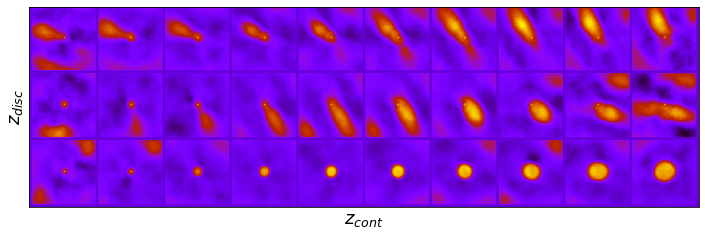

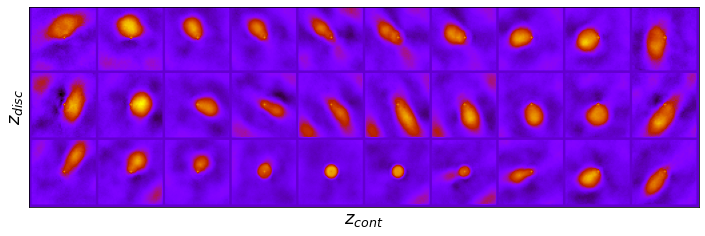

In [ ]:
for i in range(2):
    jvae.manifold_traversal(i);

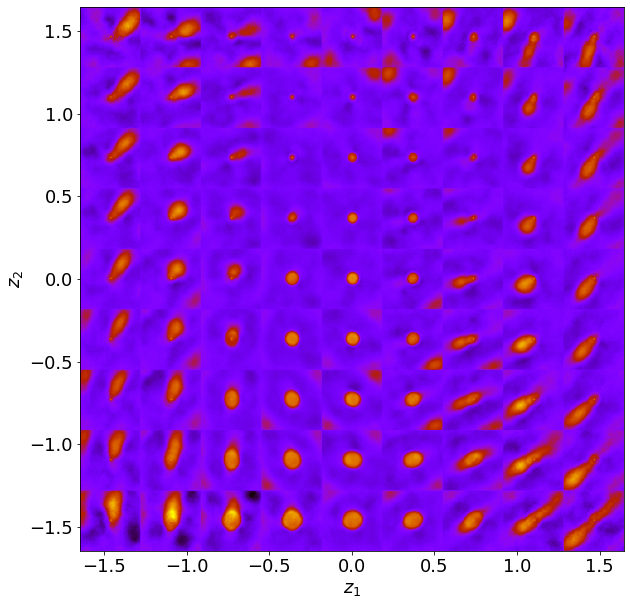

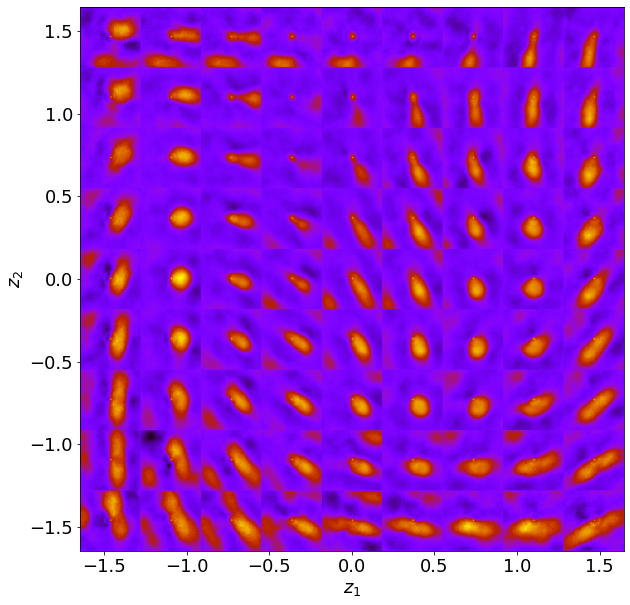

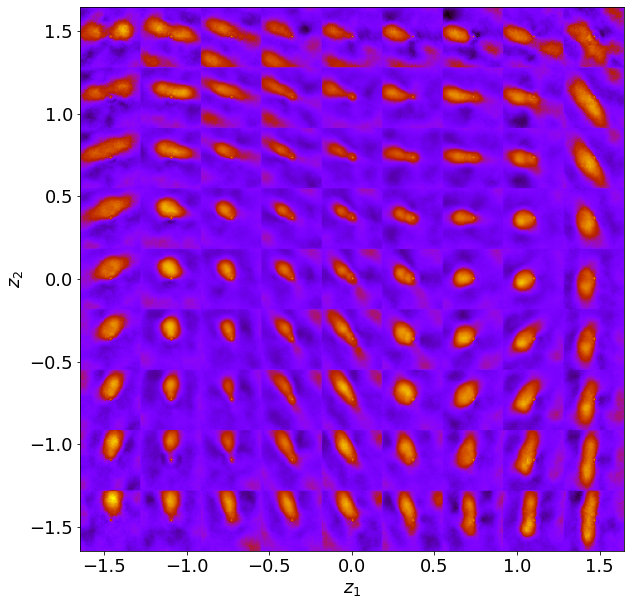

In [ ]:
for i in range(3):
    jvae.manifold2d(disc_idx=i)

In [ ]:
# alphas.shape

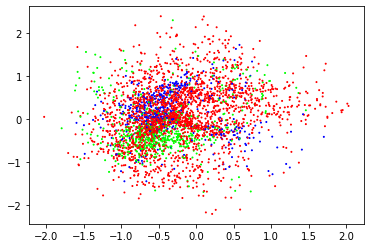

In [ ]:
plt.scatter(zj_mean[:,0], zj_mean[:,1], c = alphas, s = 1)

<function matplotlib.pyplot.show>

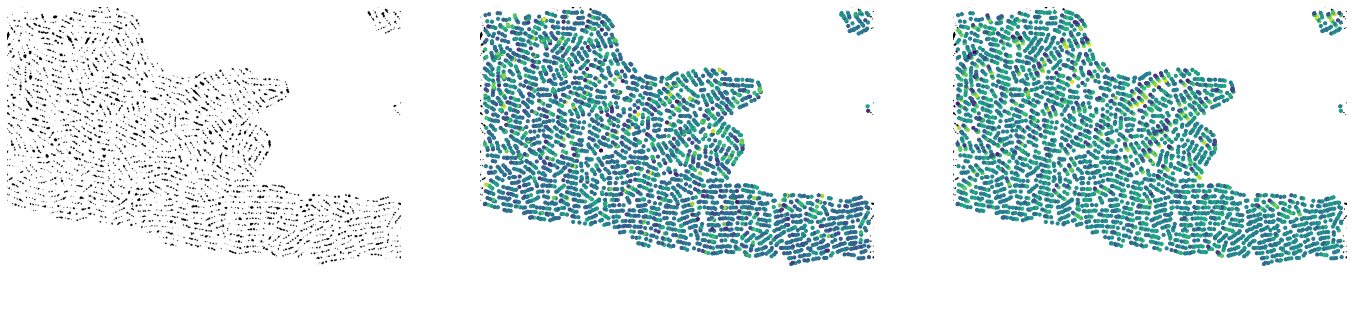

In [ ]:
work_image = image

com_i = subimg_coord # get coordinates for this frame
zvae_i = zj_mean # get latent variables (image) for this frame

fig, axes = plt.subplots(1, 3, figsize = (24,8))
ax = axes.ravel()

ax[0] = plt.subplot(1, 3, 1)
ax[1] = plt.subplot(1, 3, 2, sharex=ax[0], sharey=ax[0])
ax[2] = plt.subplot(1, 3, 3, sharex=ax[0], sharey=ax[0])

ax[0].imshow(work_image, cmap = 'Greys')
ax[0].axis('off')

ax[1].scatter(com_i[:,1], com_i[:,0], c = zvae_i[:,0], s = 10)
ax[1].imshow(work_image, cmap = 'Greys')
ax[1].axis('off')

ax[2].scatter(com_i[:,1], com_i[:,0], c = zvae_i[:,1], s = 10)
ax[2].imshow(work_image, cmap = 'Greys')
ax[2].axis('off')

plt.show

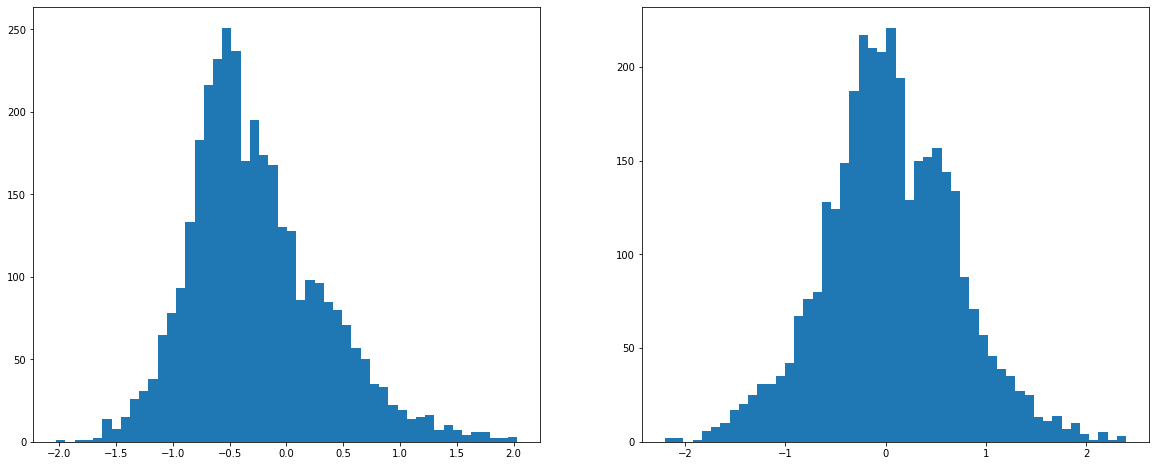

In [ ]:
fig, axes = plt.subplots(1, 2, figsize = (20,8))
ax = axes.ravel()

ax[0] = plt.subplot(1, 2, 1)
ax[0].hist(zj_mean[:,0], bins = 50);

ax[1] = plt.subplot(1, 2, 2)
ax[1].hist(zj_mean[:,1], bins = 50);

In [ ]:
import pandas as pd
import seaborn as sns

In [ ]:
ci = np.array([np.argmax(cl) for cl in alphas])
data = np.hstack((np.expand_dims(ci, axis = 1)))

data = pd.DataFrame(data, columns=['Class'])

data = pd.concat([data,pd.get_dummies(data['Class'], 
                                      prefix='Class',dummy_na=False)],axis=1).drop(['Class'],axis=1)

data.tail()

Class_0  Class_1  Class_2
3409        1        0        0
3410        1        0        0
3411        1        0        0
3412        1        0        0
3413        0        1        0

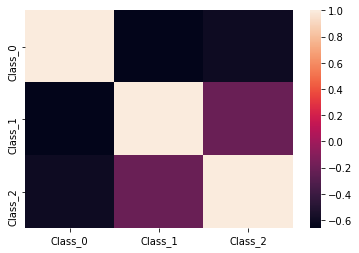

In [ ]:
ax = sns.heatmap(data.corr())

**jrVAE**

In [ ]:
!gdown "https://drive.google.com/uc?id=148lM9cTTc8oAU5Y3Uy7udLLfOVp52XP2"

Downloading...
From: https://drive.google.com/uc?id=148lM9cTTc8oAU5Y3Uy7udLLfOVp52XP2
To: /content/jrvae-48-1024.tar
91.6MB [00:00, 100MB/s] 


In [ ]:
jrvae= aoi.models.load_model("jrvae-48-1024.tar")
# # Intitialize model
# input_dim = (window_size, window_size)

# jrvae = aoi.models.jrVAE(input_dim, latent_dim=2, discrete_dim=[3],
#                         numlayers_encoder=3, numhidden_encoder=1024,
#                         numlayers_decoder=3, numhidden_decoder=1024,
#                         skip=False) 
# Train
jrvae.fit(subimg_ind, training_cycles=100, batch_size=32, loss="mse")

Epoch: 1/100, Training loss: 78.9511
Epoch: 2/100, Training loss: 79.5318
Epoch: 3/100, Training loss: 80.1465
Epoch: 4/100, Training loss: 80.8274
Epoch: 5/100, Training loss: 81.2116
Epoch: 6/100, Training loss: 81.9666
Epoch: 7/100, Training loss: 82.6372
Epoch: 8/100, Training loss: 83.1758
Epoch: 9/100, Training loss: 83.8489
Epoch: 10/100, Training loss: 84.5782
Epoch: 11/100, Training loss: 85.1410
Epoch: 12/100, Training loss: 85.6152
Epoch: 13/100, Training loss: 86.3047
Epoch: 14/100, Training loss: 87.1072
Epoch: 15/100, Training loss: 87.7185
Epoch: 16/100, Training loss: 88.3880
Epoch: 17/100, Training loss: 89.0606
Epoch: 18/100, Training loss: 89.7100
Epoch: 19/100, Training loss: 90.2796
Epoch: 20/100, Training loss: 90.9809
Epoch: 21/100, Training loss: 91.5258
Epoch: 22/100, Training loss: 92.1802
Epoch: 23/100, Training loss: 92.7479
Epoch: 24/100, Training loss: 93.3954
Epoch: 25/100, Training loss: 94.0899
Epoch: 26/100, Training loss: 94.6765
Epoch: 27/100, Traini

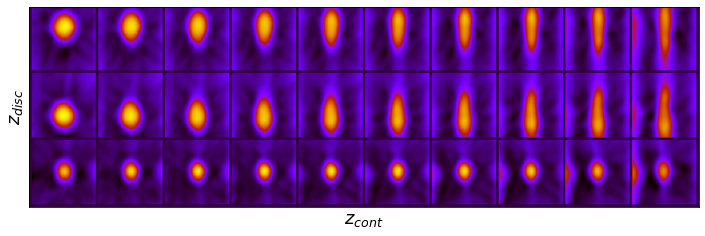

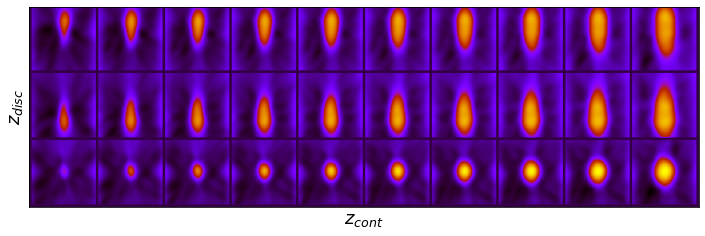

In [ ]:
for i in range(2):
    jrvae.manifold_traversal(i);

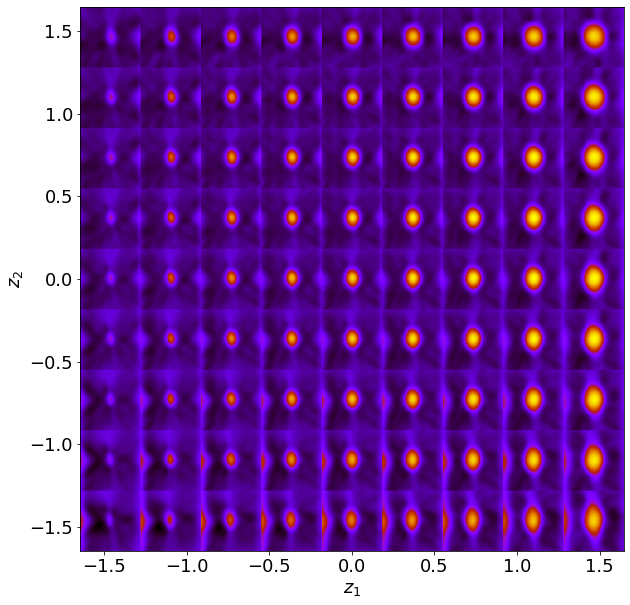

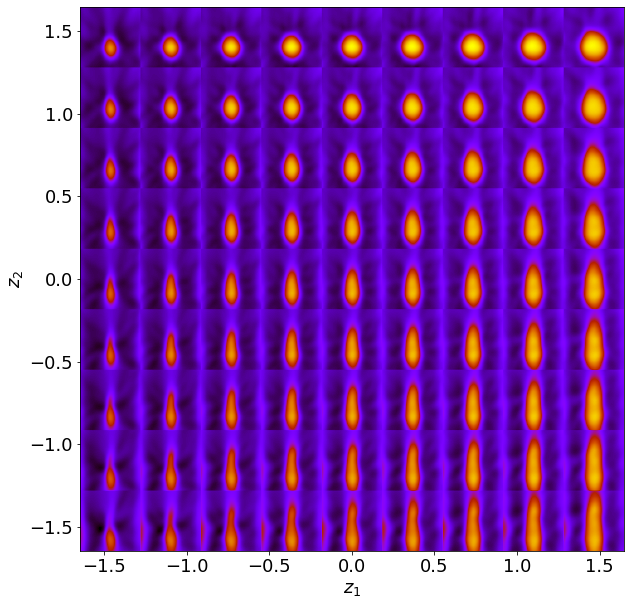

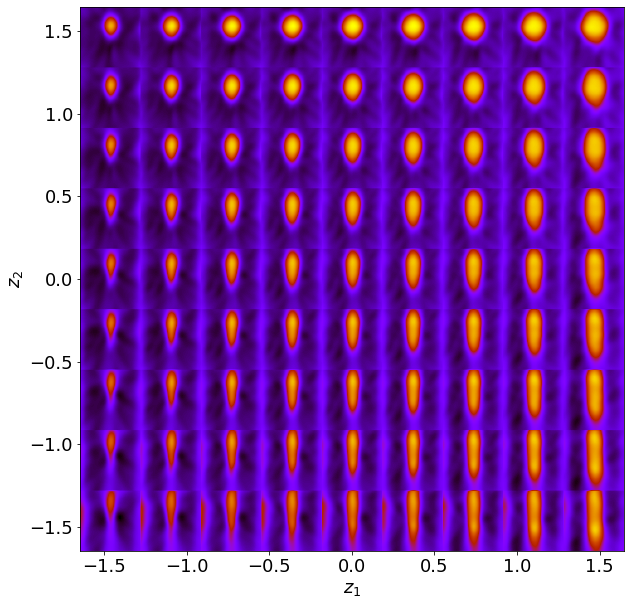

In [ ]:
for i in range(3):
    jrvae.manifold2d(disc_idx=i)

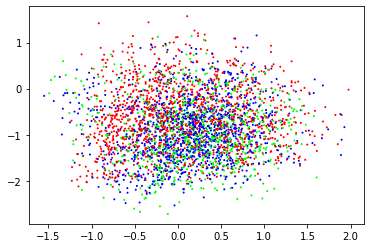

In [ ]:
a, b, c = jrvae.encode(subimg_ind)
plt.scatter(a[:,3], a[:,4], c = c, s = 1)

In [ ]:
c.shape[0]

3414

In [ ]:
c[:,0].shape

(3414,)

<function matplotlib.pyplot.show>

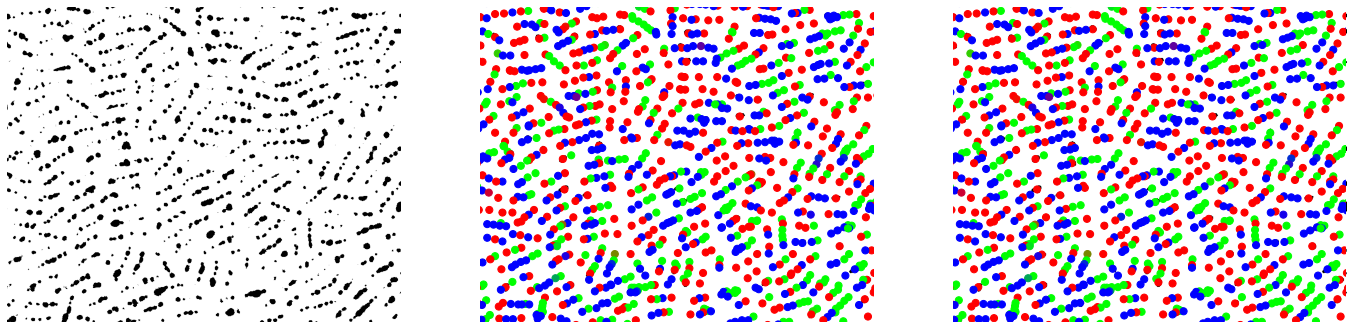

In [ ]:
fig, axes = plt.subplots(1, 3, figsize = (24,8))
ax = axes.ravel()

ax[0] = plt.subplot(1, 3, 1)
ax[1] = plt.subplot(1, 3, 2, sharex=ax[0], sharey=ax[0])
ax[2] = plt.subplot(1, 3, 3, sharex=ax[0], sharey=ax[0])

ax[0].imshow(work_image, cmap = 'Greys')
ax[0].axis('off')

ax[1].scatter(com_i[:,1], com_i[:,0], c = c, s = 50)
ax[1].imshow(work_image, cmap = 'Greys')
ax[1].axis('off')
ax[1].set_xlim([250, 1000])
ax[1].set_ylim([400, 1000])

ax[2].scatter(com_i[:,1], com_i[:,0], c = c, s = 50)
ax[2].imshow(work_image, cmap = 'Greys')
ax[2].axis('off')

plt.show

<function matplotlib.pyplot.show>

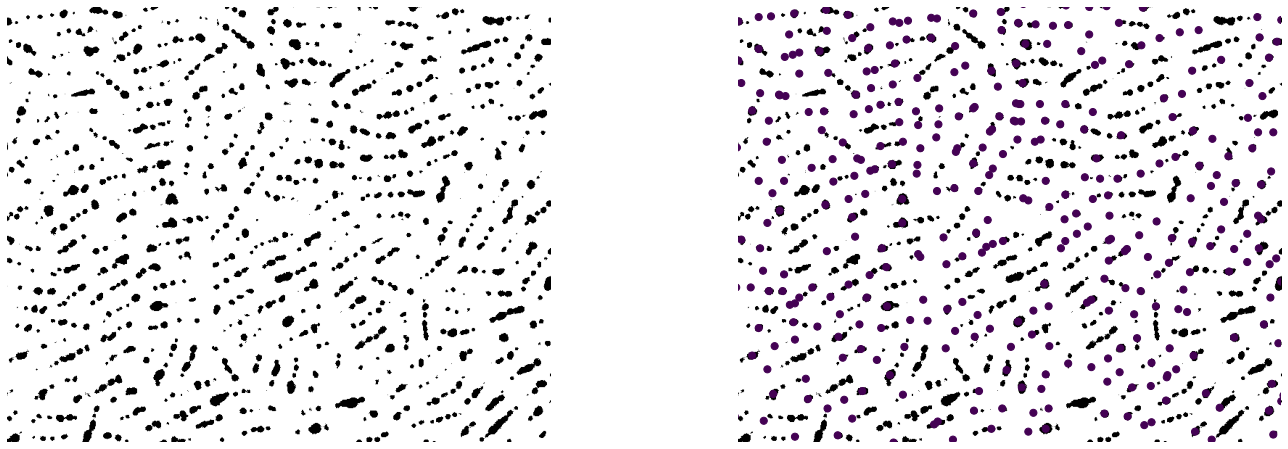

In [ ]:
work_image = image

com_i = subimg_coord # get coordinates for this frame
# zvae_i = z_mean # get latent variables (image) for this frame

threshold_z = np.array([0])
threshold_com = np.array([[0,0]])

#Define limits for z0 and z1
c0 = 1.0
for i in range(c.shape[0]):
  if c[i,0] >= c0:
    zp = np.array(c[i,0])
    threshold_z = np.vstack((threshold_z,zp))
    z0p = np.array([[com_i[i,0],com_i[i,1]]])
    threshold_com = np.vstack((threshold_com,z0p))

threshold_z = np.delete(threshold_z,0,0)
threshold_com = np.delete(threshold_com,0,0)

fig, axes = plt.subplots(1, 2, figsize = (24,8))
ax = axes.ravel()

ax[0] = plt.subplot(1, 2, 1)
ax[1] = plt.subplot(1, 2, 2, sharex=ax[0], sharey=ax[0])
# ax[2] = plt.subplot(1, 3, 3, sharex=ax[0], sharey=ax[0])

ax[0].imshow(work_image, cmap = 'Greys')
ax[0].axis('off')

  # if ((zvae_i[i,0] > 0.5) & (zvae_i[i,0] < 1.5)):

ax[1].scatter(threshold_com[:,1], threshold_com[:,0], c = threshold_z[:,0], s = 50)
ax[1].imshow(work_image, cmap = 'Greys')
ax[1].axis('off')
ax[1].set_xlim([250, 1000])
ax[1].set_ylim([400, 1000])


#   # if ((zvae_i[i,1] > -1.5) & (zvae_i[i,1] < -0.5)):
# ax[2].scatter(threshold_com[:,1], threshold_com[:,0], c = threshold_z[:,1], s = 10)
# ax[2].imshow(work_image, cmap = 'Greys')
# ax[2].axis('off')

plt.show

<function matplotlib.pyplot.show>

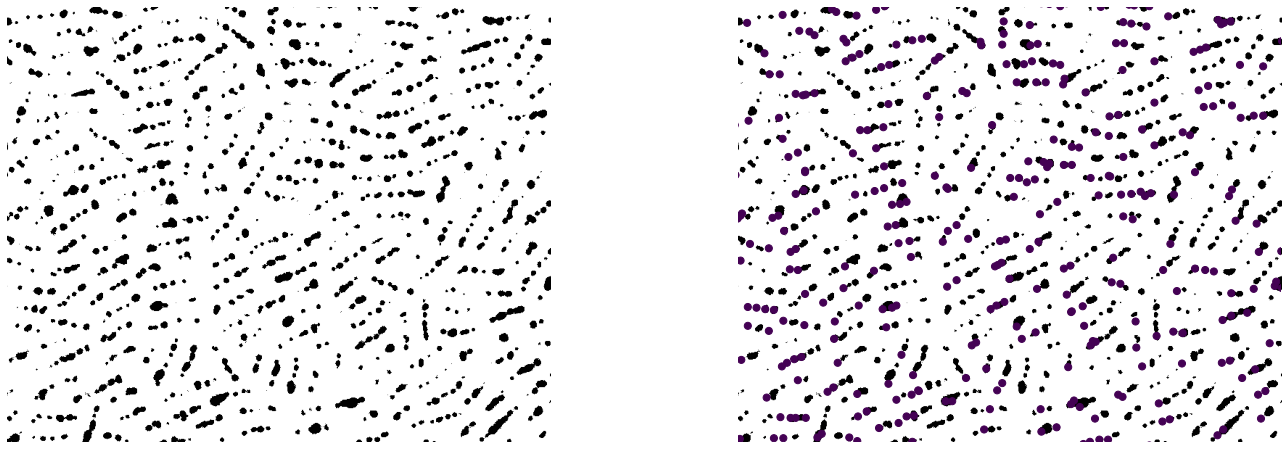

In [ ]:
work_image = image

com_i = subimg_coord # get coordinates for this frame
# zvae_i = z_mean # get latent variables (image) for this frame

threshold_z = np.array([0])
threshold_com = np.array([[0,0]])

#Define limits for z0 and z1
c0 = 1.0
for i in range(c.shape[0]):
  if c[i,2] >= c0:
    zp = np.array(c[i,2])
    threshold_z = np.vstack((threshold_z,zp))
    z0p = np.array([[com_i[i,0],com_i[i,1]]])
    threshold_com = np.vstack((threshold_com,z0p))

threshold_z = np.delete(threshold_z,0,0)
threshold_com = np.delete(threshold_com,0,0)

fig, axes = plt.subplots(1, 2, figsize = (24,8))
ax = axes.ravel()

ax[0] = plt.subplot(1, 2, 1)
ax[1] = plt.subplot(1, 2, 2, sharex=ax[0], sharey=ax[0])

ax[0].imshow(work_image, cmap = 'Greys')
ax[0].axis('off')

ax[1].scatter(threshold_com[:,1], threshold_com[:,0], c = threshold_z[:,0], s = 50)
ax[1].imshow(work_image, cmap = 'Greys')
ax[1].axis('off')
ax[1].set_xlim([250, 1000])
ax[1].set_ylim([400, 1000])


plt.show

<function matplotlib.pyplot.show>

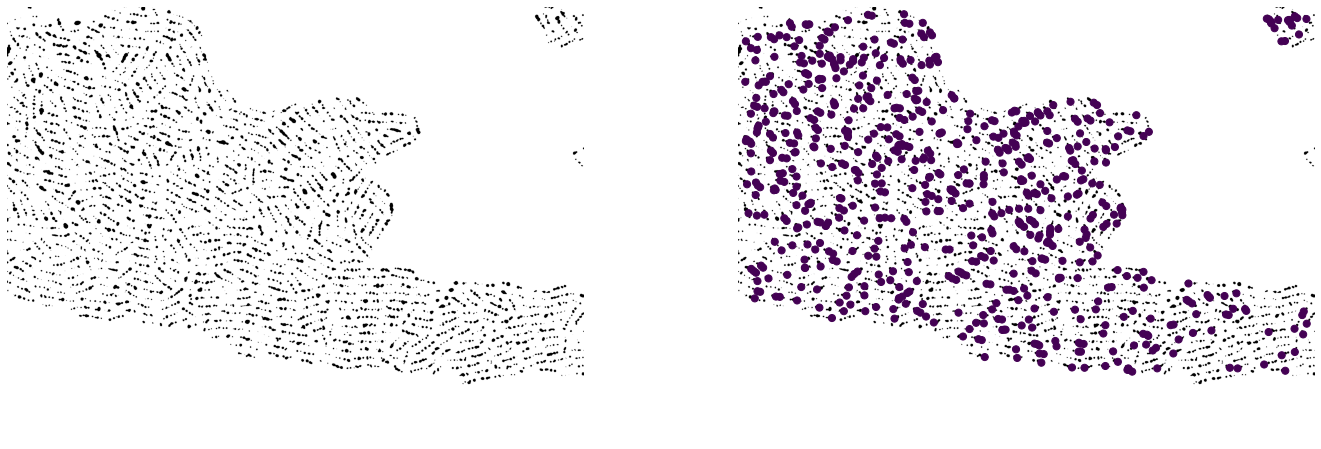

In [ ]:
work_image = image

com_i = subimg_coord # get coordinates for this frame
# zvae_i = z_mean # get latent variables (image) for this frame

threshold_z = np.array([0])
threshold_com = np.array([[0,0]])

#Define limits for z0 and z1
c0 = 1.0
for i in range(c.shape[0]):
  if c[i,1] >= c0:
    zp = np.array(c[i,1])
    threshold_z = np.vstack((threshold_z,zp))
    z0p = np.array([[com_i[i,0],com_i[i,1]]])
    threshold_com = np.vstack((threshold_com,z0p))

threshold_z = np.delete(threshold_z,0,0)
threshold_com = np.delete(threshold_com,0,0)

fig, axes = plt.subplots(1, 2, figsize = (24,8))
ax = axes.ravel()

ax[0] = plt.subplot(1, 2, 1)
ax[1] = plt.subplot(1, 2, 2, sharex=ax[0], sharey=ax[0])

ax[0].imshow(work_image, cmap = 'Greys')
ax[0].axis('off')

ax[1].scatter(threshold_com[:,1], threshold_com[:,0], c = threshold_z[:,0], s = 50)
ax[1].imshow(work_image, cmap = 'Greys')
ax[1].axis('off')
# ax[1].set_xlim([250, 1000])
# ax[1].set_ylim([400, 1000])

plt.show

In [ ]:
ci = np.array([np.argmax(cl) for cl in c])
data = np.hstack((np.expand_dims(ci, axis = 1)))

data = pd.DataFrame(data, columns=['Class'])

data = pd.concat([data,pd.get_dummies(data['Class'], 
                                      prefix='Class',dummy_na=False)],axis=1).drop(['Class'],axis=1)

data.tail()

Class_0  Class_1  Class_2
3409        1        0        0
3410        1        0        0
3411        0        1        0
3412        0        1        0
3413        0        0        1

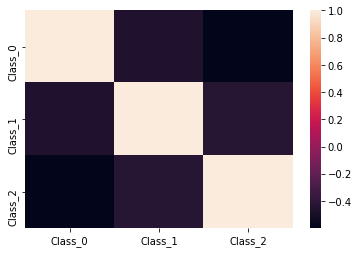

In [ ]:
ax = sns.heatmap(data.corr())

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

KeyboardInterrupt: ignored

In [ ]:
jvae.save_model("jvae-48-1024")

In [ ]:
jrvae.save_model("jrvae-48-1024")

In [ ]:
!ls


In [ ]:
mv jrvae-48-1024.tar gdrive/MyDrive/

In [ ]:
mv jvae-48-1024.tar gdrive/MyDrive/